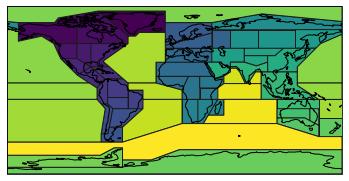

In [1]:
import matplotlib.pyplot as plt
import geopandas as gp
import cartopy.crs as ccrs
import numpy as np
import regionmask
from scipy import signal as sig
from netCDF4 import Dataset
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# regiondir='/anaconda2/envs/geo_env/lib/python3.8/site-packages/regionmask/defined_regions/data/AR6_WGI_referenceRegions'
# df = gp.read_file("%s/AR6_WGI_referenceRegions.shp" % regiondir)

regiondir = '/home/chaincy/research/ipcc/IPCC-WGI-reference-regions-v4'
df = gp.read_file("%s/IPCC-WGI-reference-regions-v4.shp" % regiondir)
df["i"] = df.index # assing the index as column, so we can use it to color the regions

f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
df.plot(column="i", ax=ax, transform=ccrs.PlateCarree(), edgecolor="0.1")
ax.coastlines()

In [2]:
from git import Repo

repo = Repo("/home/chaincy/research/ipcc") 
commit_hash = repo.git.rev_parse('HEAD')
gitcurrent = commit_hash[0:5]
print ('current git %s'%gitcurrent)

current git 49470


In [3]:
df

,Continent,Type,Name,Acronym,geometry,i
0,POLAR,Land,Greenland/Iceland,GIC,"POLYGON ((-10.00000 62.00000, -10.43750 62.000...",0
1,NORTH-AMERICA,Land,N.W.North-America,NWN,"POLYGON ((-105.00000 50.00000, -105.43860 50.0...",1
2,NORTH-AMERICA,Land,N.E.North-America,NEN,"POLYGON ((-50.00000 50.00000, -50.44000 50.000...",2
3,NORTH-AMERICA,Land,W.North-America,WNA,"POLYGON ((-130.00000 50.00000, -129.56140 50.0...",3
4,NORTH-AMERICA,Land,C.North-America,CNA,"POLYGON ((-90.00000 50.00000, -90.00000 49.561...",4
5,NORTH-AMERICA,Land,E.North-America,ENA,"POLYGON ((-70.00000 25.00000, -70.43478 25.000...",5
6,CENTRAL-AMERICA,Land,N.Central-America,NCA,"POLYGON ((-90.00000 25.00000, -90.37179 24.769...",6
7,CENTRAL-AMERICA,Land,S.Central-America,SCA,"POLYGON ((-75.00000 12.00000, -75.28000 11.673...",7
8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,"POLYGON ((-75.00000 12.00000, -75.32609 12.282...",8
9,SOUTH-AMERICA,Land,N.W.South-America,NWS,"POLYGON ((-75.00000 12.00000, -74.57143 12.000...",9


In [4]:
# read the erf netcdf file

erfdir='/home/chaincy/research/ipcc/recipe_ck_erf_histSST-piAer_time_20210309_004424/plots/diffexpts/ar6fig6_erf_time'
flwerf=Dataset('%s/LW_diff_timemap.nc' % erfdir,mode='r')

nlat=flwerf.dimensions['lat'].size
nlon=flwerf.dimensions['lon'].size
ntime=flwerf.dimensions['time'].size

lat=np.zeros((nlat,))
lon=np.zeros((nlon,))
lwerftime=np.zeros((ntime,nlat,nlon))
lat=flwerf.variables['lat'][:]
lon=flwerf.variables['lon'][:]


lwerftime[:,:,:] = flwerf.variables['ERF'][:]

flwerf.close()

In [5]:
# read the erf netcdf file

erfdir='/home/chaincy/research/ipcc/recipe_ck_erf_histSST-piAer_time_20210309_004424/plots/diffexpts/ar6fig6_erf_time'
fswerf=Dataset('%s/SW_diff_timemap.nc' % erfdir,mode='r')

nlat=fswerf.dimensions['lat'].size
nlon=fswerf.dimensions['lon'].size
ntime=fswerf.dimensions['time'].size

lat=np.zeros((nlat,))
lon=np.zeros((nlon,))
swerftime=np.zeros((ntime,nlat,nlon))
lat=fswerf.variables['lat'][:]
lon=fswerf.variables['lon'][:]


swerftime[:,:,:] = fswerf.variables['ERF'][:]

fswerf.close()

In [6]:
np.shape(lwerftime)

(165, 180, 360)

In [7]:
#ar6wg1regions = regionmask.Regions(df.geometry, names=df.V2, abbrevs=df.V3, name='ar6wg1')
ar6wg1regions = regionmask.Regions(df.geometry, names=df.Name, abbrevs=df.Continent, name='ar6wg1')

/home/chaincy/anaconda3/envs/ipcc_geoimg/lib/python3.8/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:


In [8]:
ar6wg1mask = ar6wg1regions.mask(lon, lat)#, xarray=False)

In [9]:
# determine the quandrangle area weight 

areaweight = np.zeros((nlat,nlon),dtype=float);
lat4wt = np.zeros((nlat,2),dtype=float);
lon4wt = np.zeros((nlon,2),dtype=float);
# assumption that cells are equally spaced., but this is not correct for latitudes
dellon = 360.0/nlon;
for ilat in range(0,nlat):
    if(ilat==0):
        dellat1 = (90.0-np.abs(lat[ilat]))/2;
    else:
        dellat1 = np.abs(lat[ilat]-lat[ilat-1])/2;
    if(ilat==nlat-1):
        dellat2 = (90.0-np.abs(lat[ilat]))/2;
    else:
        dellat2 = np.abs(lat[ilat+1]-lat[ilat])/2;

    lat4wt[ilat,0] = (lat[ilat]-dellat1)/180.0 * np.pi;
    lat4wt[ilat,1] = (lat[ilat]+dellat2)/180.0 * np.pi;
for ilon in range(0,nlon):
    lon4wt[ilon,0] = (lon[ilon]-dellon/2)/180.0 * np.pi;
    lon4wt[ilon,1] = (lon[ilon]+dellon/2)/180.0 * np.pi;
for ilat in range(0,nlat):
    for ilon in range(0,nlon):
        areaweight[ilat,ilon] = np.abs(lon4wt[ilon,1]-lon4wt[ilon,0]) * np.abs(np.sin(lat4wt[ilat,1])-np.sin(lat4wt[ilat,0])) / (4.0*np.pi);       
        
np.sum(areaweight)

0.9999904807207345

In [10]:
ntime

165

In [11]:
nyears = ntime
lwerfann=np.zeros((nyears,nlat,nlon))
lwerfann=lwerftime

In [12]:
nyears = ntime
swerfann=np.zeros((nyears,nlat,nlon))
swerfann=swerftime

In [13]:
ar6wg1LGregions = regionmask.Regions(df.geometry, names=df.Continent, name='ar6wg1LG')

/home/chaincy/anaconda3/envs/ipcc_geoimg/lib/python3.8/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:


In [14]:
ar6wg1LGmask = ar6wg1LGregions.mask(lon, lat)#, xarray=False)

In [15]:
ar6wg1LGregions

<regionmask.Regions>
Name:     ar6wg1LG

Regions:
 0  r0         POLAR
 1  r1 NORTH-AMERICA
 2  r2 NORTH-AMERICA
 3  r3 NORTH-AMERICA
 4  r4 NORTH-AMERICA
..  ..           ...
53 r53        INDIAN
54 r54        INDIAN
55 r55        INDIAN
56 r56        INDIAN
57 r57      SOUTHERN

[58 regions]

In [16]:
nrgns=len(ar6wg1regions.numbers)
onesgrid=np.ones((nlat,nlon),dtype=int)


In [17]:
nlgrgns=len(ar6wg1LGregions.numbers)

LGregions=[ar6wg1LGregions.names[0]]
LGregionIndex=np.zeros((nlgrgns,),dtype=int)
for irgn in range(1,nrgns):
    foundLGregion=0
    for ilgrgn in range(0,len(LGregions)):
        if(ar6wg1LGregions.names[irgn]==LGregions[ilgrgn]):
            LGregionIndex[irgn]=ilgrgn
            foundLGregion=1
    if(foundLGregion==0):
        LGregions.append(ar6wg1LGregions.names[irgn])
        LGregionIndex[irgn]=len(LGregions)-1

In [18]:
nlgrgns=len(LGregions)


eartharea = 4*np.pi*np.power(6378,2)    
totalarea = 0
    
slope_mod=np.zeros((nlgrgns,)) 
slope_hist=np.zeros((nlgrgns,)) 
swerf_annmns=np.zeros((nlgrgns,nyears))
swerf_annstd=np.zeros((nlgrgns,nyears))
lwerf_annmns=np.zeros((nlgrgns,nyears))
lwerf_annstd=np.zeros((nlgrgns,nyears))

swerf_rgnannmns=np.zeros((nrgns,nyears))
lwerf_rgnannmns=np.zeros((nrgns,nyears))

LGrgnwtmask = np.zeros((nlgrgns,))
nSMrgnsinLG=np.zeros((nlgrgns,),dtype=int)
for irgn in range(0,nrgns):
    wtmask = np.ma.masked_where(ar6wg1LGmask != irgn, areaweight)
    LGrgnwtmask[LGregionIndex[irgn]] = LGrgnwtmask[LGregionIndex[irgn]] + np.sum(wtmask)
    # count how many small regions appear in the large region
    nSMrgnsinLG[LGregionIndex[irgn]] = nSMrgnsinLG[LGregionIndex[irgn]] + 1
    for iyear in range(0,nyears):
        maskplotlw = np.ma.masked_where(ar6wg1LGmask != irgn, lwerfann[iyear,:,:])
        maskplotsw = np.ma.masked_where(ar6wg1LGmask != irgn, swerfann[iyear,:,:])
        maskones = np.ma.masked_where(ar6wg1LGmask != irgn, onesgrid)
        
        ngrids = np.sum(maskones)
        
        lwerf_annmns_now = np.sum(maskplotlw*wtmask)
        swerf_annmns_now = np.sum(maskplotsw*wtmask)
        
        lwerf_annmns[LGregionIndex[irgn],iyear]=lwerf_annmns[LGregionIndex[irgn],iyear]+lwerf_annmns_now
        swerf_annmns[LGregionIndex[irgn],iyear]=swerf_annmns[LGregionIndex[irgn],iyear]+swerf_annmns_now
        
        lwerf_rgnannmns[irgn,iyear]=lwerf_annmns_now/np.sum(wtmask)
        swerf_rgnannmns[irgn,iyear]=swerf_annmns_now/np.sum(wtmask)
        
for ilgrgn in range(0,nlgrgns):
    lwerf_annmns[ilgrgn,:]=lwerf_annmns[ilgrgn,:]/LGrgnwtmask[ilgrgn]
    swerf_annmns[ilgrgn,:]=swerf_annmns[ilgrgn,:]/LGrgnwtmask[ilgrgn]

## Global means from grids   



\begin{eqnarray*}
<ERF^k(t)> &=& \frac{ \Sigma_{ij}^{i,j \subset k} ERF(t,i,j)wt(i,j) }{\Sigma_{ij}^{i,j \subset k} wt(i,j)} 
\end{eqnarray*}

\begin{eqnarray*}
<ERF(t)_{global} &=& \Sigma_k <ERF^k(t)> {\Sigma_{ij}^{i,j \subset k} wt(i,j)} \\
&=& \Sigma_k\frac{ \Sigma_{ij}^{i,j \subset k} ERF(t,i,j)wt(i,j) \Sigma_{ij}^{i,j \subset k} wt(i,j)}{\Sigma_{ij}^{i,j \subset k} wt(i,j)}   \\
&=& \Sigma_{ij}^{i,j \subset global} ERF(t,i,j)wt(i,j)
\end{eqnarray*}

$i,j$ are indices of gridded lon/lat, and $k$ is the region index.

$  \Sigma_{ij}^{i,j \subset global} wt(i,j) = 1 $

In [19]:
globalmean=np.zeros((nyears,))

for iyear in range(0,nyears):
    globalmean[iyear]=np.sum((swerftime[iyear,:,:]+lwerftime[iyear,:,:])*areaweight[:,:])

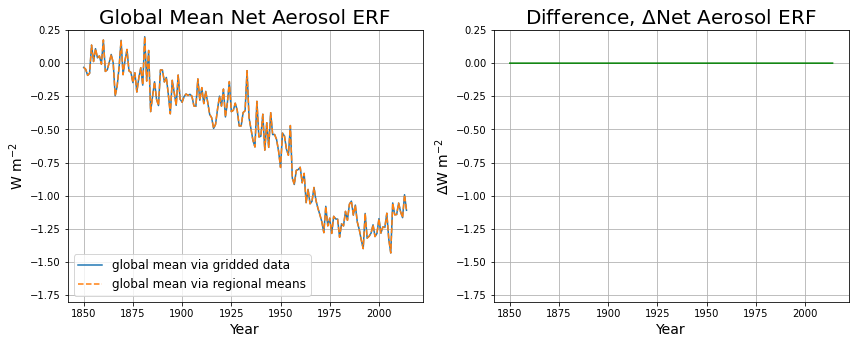

In [20]:
styr = 1850

fig = plt.figure(figsize=(14,5))

globalmeanrgns=np.zeros((nyears,))
for iyear in range(0,nyears):
    for ilgrgn in range(0,nlgrgns):
        globalmeanrgns[iyear]=globalmeanrgns[iyear]+((lwerf_annmns[ilgrgn,iyear]+swerf_annmns[ilgrgn,iyear])*LGrgnwtmask[ilgrgn])

plt.subplot(1,2,1)
plt.plot(np.arange(styr,styr+nyears),globalmean,label='global mean via gridded data')
plt.plot(np.arange(styr,styr+nyears),globalmeanrgns,ls='dashed',label='global mean via regional means')
plt.xlabel('Year',fontsize=14)
plt.ylabel(r'W m$^{-2}$',fontsize=14)
plt.title('Global Mean Net Aerosol ERF',fontsize=20)
plt.legend(fontsize=12)
plt.ylim(-1.8,0.25)
plt.grid()

plt.subplot(1,2,2)
plt.plot(np.arange(styr,styr+nyears),globalmeanrgns-globalmean,'g')
plt.xlabel('Year',fontsize=14)
plt.ylabel(r'$\Delta$W m$^{-2}$',fontsize=14)
plt.title(r'Difference, $\Delta$Net Aerosol ERF',fontsize=20)
# plt.legend(fontsize=12)
plt.ylim(-1.8,0.25)
plt.grid()

#plt.savefig('TemporalERF_NET_1850-2014.png',dpi=300)

<Figure size 1080x720 with 0 Axes>

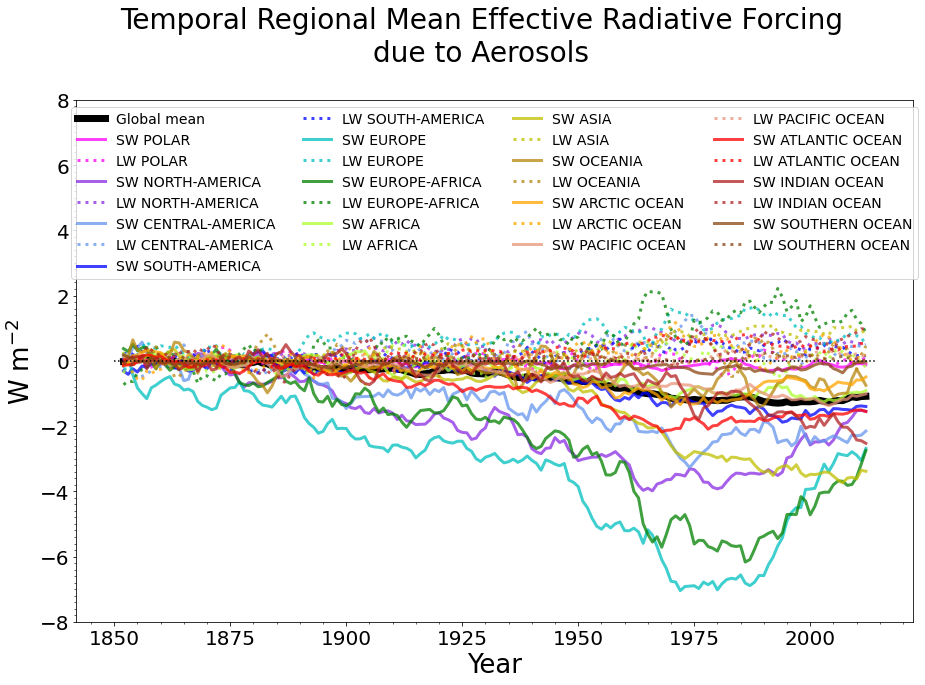

In [21]:
# 14 large Atlas regions
nrows=1
ncols=1

# boxcar for running average window
boxsize = 5 # years
boxcarwin = np.ones((int(boxsize),))/float(boxsize)

# assign colors to large Atlas regions
nclr=['magenta','blueviolet','cornflowerblue','b','c','g','greenyellow','y','darkgoldenrod','orange','darksalmon','r','firebrick','saddlebrown']

plt.figure(figsize=(ncols*15,nrows*10))
fig, ax = plt.subplots(figsize=(ncols*15,nrows*10))
plt.suptitle('Temporal Regional Mean Effective Radiative Forcing''\n''due to Aerosols', fontsize=28)

plt.subplots_adjust(top=0.85)

ymax=np.max([np.abs(lwerf_annmns),np.abs(swerf_annmns)])
ymax=6
ymin=-7

styr=2014-nyears+1

boxneterf = sig.convolve((lwerf_annmns[:,:]+swerf_annmns[:,:]).mean(axis=0),boxcarwin,'valid')
boxglobalmean = sig.convolve(globalmean,boxcarwin,'valid')
yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'valid');
# plt.plot(np.arange(styr,styr+nyears),boxglobalmean,color='k',linewidth=7,label='Global mean' )
plt.plot(yrbox,boxglobalmean,color='k',linewidth=7,label='Global mean' )
#plt.title('%d-year running window, valid values  %d-%d'%(boxsize,yrbox[0],yrbox[len(yrbox)-1]))
for ilgrgn in range(0,nlgrgns):
    
    boxlwerf = sig.convolve(lwerf_annmns[ilgrgn,:],boxcarwin,'valid');
    boxswerf = sig.convolve(swerf_annmns[ilgrgn,:],boxcarwin,'valid');
    yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'valid');
    
    # running average
    curvelabel = '%s' % LGregions[ilgrgn]
    if((ilgrgn>8) & (ilgrgn<nlgrgns)):
        curvelabel = curvelabel+' OCEAN'
    # plt.plot(np.arange(styr,styr+nyears),boxswerf+boxlwerf,color=nclr[ilgrgn],linewidth=3,label=curvelabel,alpha=0.75)
    plt.plot(yrbox,boxswerf,color=nclr[ilgrgn],linewidth=3,label='SW %s'%curvelabel,alpha=0.75)
    plt.plot(yrbox,boxlwerf,color=nclr[ilgrgn],linewidth=3,linestyle=':',label='LW %s'%curvelabel,alpha=0.75)
    

plt.plot(np.arange(styr,styr+nyears),np.zeros((nyears,)),'k:')

    
plt.legend(loc=9,ncol=4,fontsize=14)
    
ymax=8
ymin=-ymax
plt.ylim(ymin,ymax)
plt.xlabel(r'Year',fontsize=26)
plt.ylabel(r'W m$^{-2}$',fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.grid(which='major',lw=1)
#plt.grid(which='minor',lw=1)
    
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#ax.tick_params(axis='both',which='minor',direction='in')

#plt.text(1850,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_hist[ilgrgn])
#plt.text(1995,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_mod[ilgrgn])



<Figure size 1080x720 with 0 Axes>

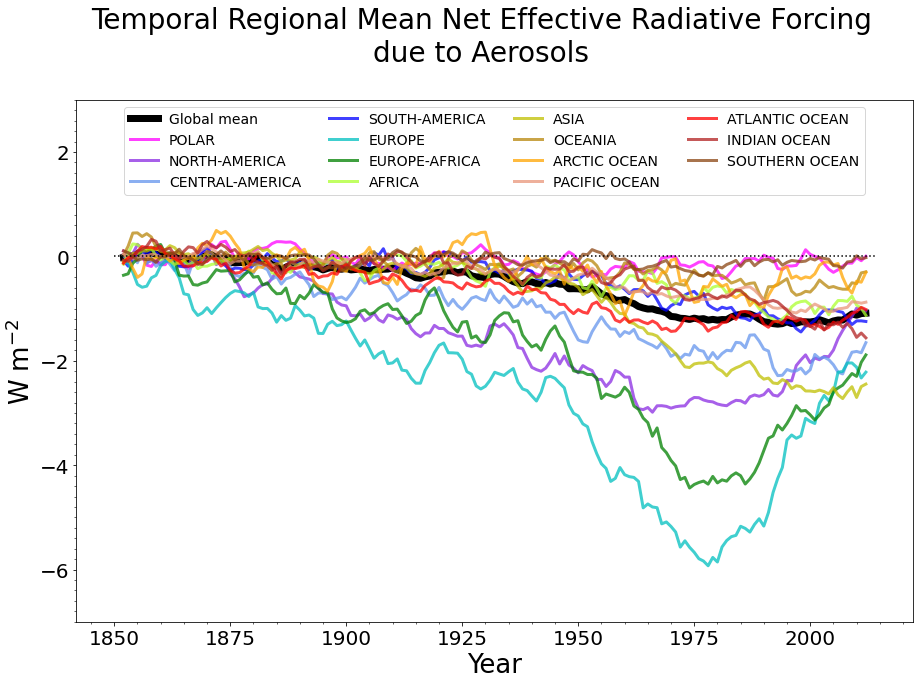

In [23]:
# 14 large Atlas regions
nrows=1
ncols=1

# boxcar for running average window
boxsize = 5 # years
boxcarwin = np.ones((int(boxsize),))/float(boxsize)

# assign colors to large Atlas regions
nclr=['magenta','blueviolet','cornflowerblue','b','c','g','greenyellow','y','darkgoldenrod','orange','darksalmon','r','firebrick','saddlebrown']

plt.figure(figsize=(ncols*15,nrows*10))
fig, ax = plt.subplots(figsize=(ncols*15,nrows*10))
plt.suptitle('Temporal Regional Mean Net Effective Radiative Forcing''\n''due to Aerosols', fontsize=28)

plt.subplots_adjust(top=0.85)

ymax=np.max([np.abs(lwerf_annmns),np.abs(swerf_annmns)])
ymax=6
ymin=-7

styr=2014-nyears+1

boxneterf = sig.convolve((lwerf_annmns[:,:]+swerf_annmns[:,:]).mean(axis=0),boxcarwin,'valid')
boxglobalmean = sig.convolve(globalmean,boxcarwin,'valid')
yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'valid');
# plt.plot(np.arange(styr,styr+nyears),boxglobalmean,color='k',linewidth=7,label='Global mean' )
plt.plot(yrbox,boxglobalmean,color='k',linewidth=7,label='Global mean' )
#plt.title('%d-year running window, valid values  %d-%d'%(boxsize,yrbox[0],yrbox[len(yrbox)-1]))
for ilgrgn in range(0,nlgrgns):
    
    boxlwerf = sig.convolve(lwerf_annmns[ilgrgn,:],boxcarwin,'valid');
    boxswerf = sig.convolve(swerf_annmns[ilgrgn,:],boxcarwin,'valid');
    yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'valid');
    
    # running average
    curvelabel = '%s' % LGregions[ilgrgn]
    if((ilgrgn>8) & (ilgrgn<nlgrgns)):
        curvelabel = curvelabel+' OCEAN'
    # plt.plot(np.arange(styr,styr+nyears),boxswerf+boxlwerf,color=nclr[ilgrgn],linewidth=3,label=curvelabel,alpha=0.75)
    plt.plot(yrbox,boxswerf+boxlwerf,color=nclr[ilgrgn],linewidth=3,label=curvelabel,alpha=0.75)
    

plt.plot(np.arange(styr,styr+nyears),np.zeros((nyears,)),'k:')

    
plt.legend(loc=9,ncol=4,fontsize=14)
    
plt.ylim(ymin,3)
plt.xlabel(r'Year',fontsize=26)
plt.ylabel(r'W m$^{-2}$',fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.grid(which='major',lw=1)
#plt.grid(which='minor',lw=1)
    
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#ax.tick_params(axis='both',which='minor',direction='in')

#plt.text(1850,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_hist[ilgrgn])
#plt.text(1995,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_mod[ilgrgn])


# plt.savefig('regionsTemporalERF_NET_%d_%d_window=%d_noGrid.png'%(yrbox[0],yrbox[len(yrbox)-1],boxsize),dpi=300,bbox_inches='tight')
plt.savefig('ar6_wg1_chap6_fig6_11_netERF_time_aer.png',dpi=300,bbox_inches='tight')